<a href="https://colab.research.google.com/github/4gzjw4dq7h-coder/SDRIS_Axioms2a1/blob/main/SDRIS_Emergence_Genesis_Saturation17D_Falsifiability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:172: SyntaxWarning: invalid escape sequence '\l'
<>:172: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-670691534.py:172: SyntaxWarning: invalid escape sequence '\l'
  ax2.set_ylabel("Tension $\lambda$")


Starte SDRIS Framework Simulation...
- Generiere Quanten-Geometrie (Genesis)...
- Berechne Dimensionale Spannung (Matrix)...
  -> Daten gespeichert: SDRIS_Saturation_Data.csv
- Synthetisiere Vakuum-Rauschen (Primes)...
  -> Daten gespeichert: SDRIS_Vacuum_Noise_Spectrum.csv


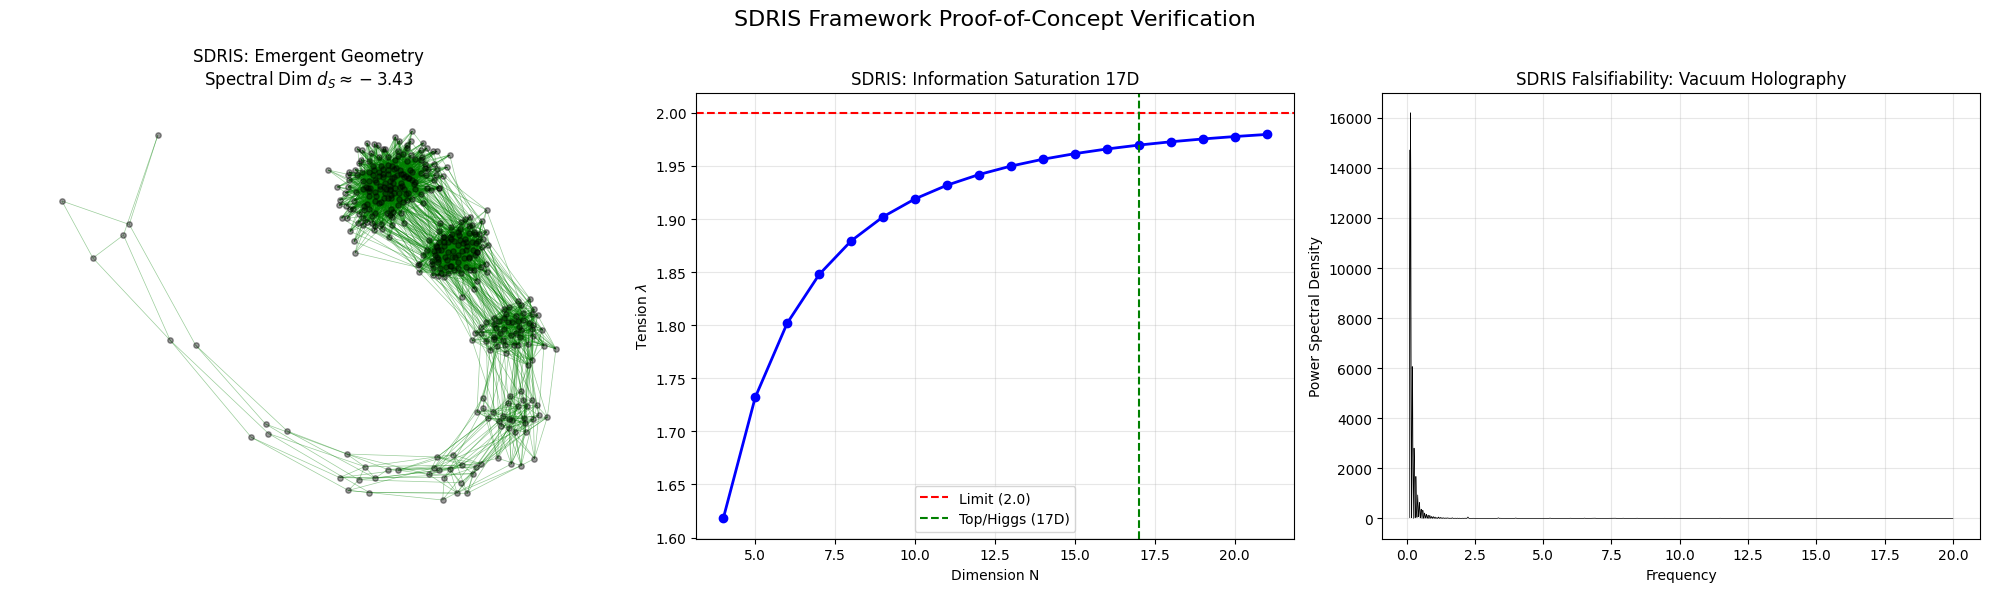


Starte Download der Dateien...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download initiiert. Bitte Pop-Ups erlauben, falls nötig.


In [3]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals
import pandas as pd
try:
    from google.colab import files
except ImportError:
    pass # Falls lokal ausgeführt, wird dieser Import übersprungen

# ==========================================
# TEIL 1: GENESIS (Das wachsende Universum)
# ==========================================
class SDRIS_Universe:
    def __init__(self, p=2, p_fork=0.90, p_link=0.15):
        self.graph = nx.Graph()
        self.root_id = "0"
        self.graph.add_node(self.root_id, depth=0, active=True)
        self.active_nodes = [self.root_id]
        self.p = p
        self.p_fork = p_fork
        self.p_link = p_link
        self.time_step = 0

    def get_padic_distance(self, node1, node2):
        try:
            lca = nx.lowest_common_ancestor(self.graph, node1, node2)
            depth_lca = len(lca) if lca else 0
            return self.p ** (-depth_lca)
        except:
            return 1.0

    def step(self):
        self.time_step += 1
        new_nodes = []
        # 1. FORK (Zeit)
        for node in self.active_nodes:
            if random.random() < self.p_fork:
                for i in range(self.p):
                    child_id = f"{node}.{i}"
                    self.graph.add_node(child_id, depth=self.time_step, active=True)
                    self.graph.add_edge(node, child_id, type='recursive')
                    new_nodes.append(child_id)
                self.graph.nodes[node]['active'] = False

        # 2. LINK (Raum)
        potential_neighbors = new_nodes
        if len(new_nodes) > 80: potential_neighbors = random.sample(new_nodes, 80)

        for n1 in new_nodes:
            for n2 in potential_neighbors:
                if n1 == n2: continue
                dist = self.get_padic_distance(n1, n2)
                if random.random() < (self.p_link / (dist + 1e-9)):
                    self.graph.add_edge(n1, n2, type='entanglement')
        if new_nodes: self.active_nodes = new_nodes

    def measure_spectral_dimension(self, walkers=30, t_max=30):
        if self.graph.number_of_nodes() < 50: return 0
        nodes = list(self.graph.nodes())
        return_counts = np.zeros(t_max)
        for _ in range(walkers):
            curr = random.choice(nodes)
            start = curr
            for t in range(1, t_max):
                nbrs = list(self.graph.neighbors(curr))
                if not nbrs: break
                curr = random.choice(nbrs)
                if curr == start: return_counts[t] += 1
        probs = return_counts / walkers
        probs[probs == 0] = 1e-10
        t_vals = np.arange(5, t_max)
        p_vals = probs[5:]
        if len(p_vals) > 0:
            slope, _ = np.polyfit(np.log(t_vals), np.log(p_vals), 1)
            return -2 * slope
        return 0

# ==========================================
# TEIL 2: MATRIX SOLVER (Berechnung)
# ==========================================
def run_matrix_saturation(max_dim=21):
    dims = []
    max_eigs = []
    for d in range(4, max_dim + 1):
        mat = np.zeros((d, d), dtype=complex)
        for k in range(d - 1):
            mat[k, k+1] = 1j
            mat[k+1, k] = -1j
        eigs = eigvals(mat)
        max_lambda = np.max(np.abs(eigs))
        dims.append(d)
        max_eigs.append(max_lambda)
    return dims, max_eigs

# ==========================================
# TEIL 3: PRIME NOISE (Synthese)
# ==========================================
def generate_vacuum_noise(f_max=20, num_primes=400):
    limit = int(num_primes * 15)
    is_prime = [True] * limit
    primes = []
    for p in range(2, limit):
        if is_prime[p]:
            primes.append(p)
            for i in range(p*p, limit, p): is_prime[i] = False
            if len(primes) >= num_primes: break
    freqs = np.linspace(0.1, f_max, 1500)
    psd = []
    for f in freqs:
        amp = 0
        for p in primes:
            term = (np.log(p) / np.sqrt(p)) * np.cos(2 * np.pi * f * np.log(p))
            amp += term
        psd.append((1/f) * (amp**2))
    return freqs, psd

# ==========================================
# MAIN: Ausführung, Export & Download
# ==========================================
if __name__ == "__main__":
    print("Starte SDRIS Framework Simulation...")

    # 1. Simuliere Universum
    print("- Generiere Quanten-Geometrie (Genesis)...")
    uni = SDRIS_Universe()
    for _ in range(9): uni.step()
    ds = uni.measure_spectral_dimension()

    # 2. Berechne Sättigung & Exportiere Daten
    print("- Berechne Dimensionale Spannung (Matrix)...")
    dims, lambdas = run_matrix_saturation()

    # Erstelle Tabelle für Sättigung
    df_saturation = pd.DataFrame({
        'Dimension_N': dims,
        'Ontological_Tension_Lambda': lambdas
    })
    filename_sat = "SDRIS_Saturation_Data.csv"
    df_saturation.to_csv(filename_sat, index=False)
    print(f"  -> Daten gespeichert: {filename_sat}")

    # 3. Synthetisiere Rauschen & Exportiere Daten
    print("- Synthetisiere Vakuum-Rauschen (Primes)...")
    freqs, noise = generate_vacuum_noise()

    # Erstelle Tabelle für Rauschen
    df_noise = pd.DataFrame({
        'Frequency_Holographic': freqs,
        'Power_Spectral_Density': noise
    })
    filename_noise = "SDRIS_Vacuum_Noise_Spectrum.csv"
    df_noise.to_csv(filename_noise, index=False)
    print(f"  -> Daten gespeichert: {filename_noise}")

    # --- PLOTTING ---
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
    plt.suptitle("SDRIS Framework Proof-of-Concept Verification", fontsize=16)

    # Plot 1
    pos = nx.spring_layout(uni.graph, seed=42, iterations=30)
    nx.draw(uni.graph, pos, ax=ax1, node_size=15, node_color='black', edge_color='green', alpha=0.4, width=0.5)
    ax1.set_title(f"SDRIS: Emergent Geometry\nSpectral Dim $d_S \\approx {ds:.2f}$")

    # Plot 2
    ax2.plot(dims, lambdas, 'o-', color='blue', lw=2)
    ax2.axhline(2.0, color='red', linestyle='--', label='Limit (2.0)')
    ax2.axvline(17, color='green', linestyle='--', label='Top/Higgs (17D)')
    ax2.set_title("SDRIS: Information Saturation 17D")
    ax2.set_xlabel("Dimension N")
    ax2.set_ylabel("Tension $\lambda$")
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Plot 3
    ax3.plot(freqs, noise, color='black', lw=0.5)
    ax3.set_title("SDRIS Falsifiability: Vacuum Holography")
    ax3.set_xlabel("Frequency")
    ax3.set_ylabel("Power Spectral Density")
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    img_filename = "SDRIS_Complete_Proof.png"
    plt.savefig(img_filename, dpi=150)
    plt.show()

    # --- DOWNLOAD STARTEN (Nur in Colab) ---
    print("\nStarte Download der Dateien...")
    try:
        files.download(filename_sat)
        files.download(filename_noise)
        files.download(img_filename)
        print("Download initiiert. Bitte Pop-Ups erlauben, falls nötig.")
    except Exception as e:
        print("Hinweis: Automatischer Download nur in Google Colab verfügbar.")
        print("Die Dateien liegen im lokalen Verzeichnis.")